# Machine Learning

# Classification

Utilitzarem la base de dades Iris, que ens proporciona un Data Set sobre tipus de plantes i els seus pètals

In [10]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

In [9]:
import pandas as panda
import numpy as np

df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [14]:
df.target = df.target.astype('int64')
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica

    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

.. topic:: References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...

<Figure size 576x360 with 0 Axes>

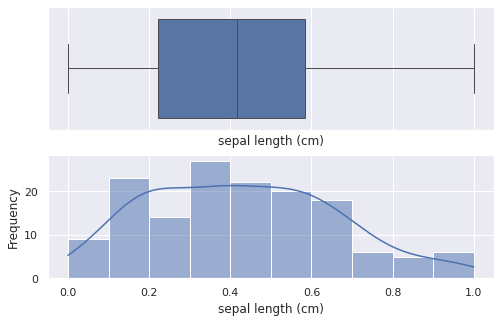

<Figure size 576x360 with 0 Axes>

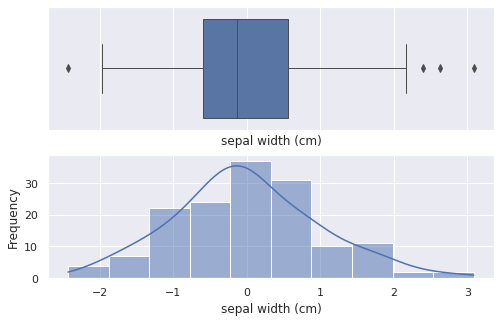

<Figure size 576x360 with 0 Axes>

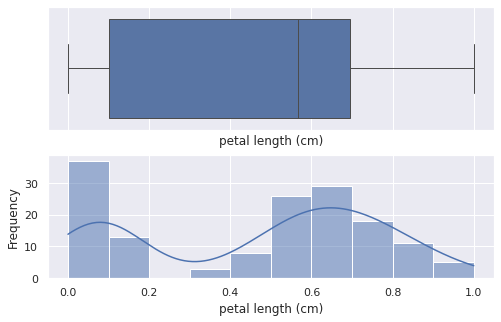

<Figure size 576x360 with 0 Axes>

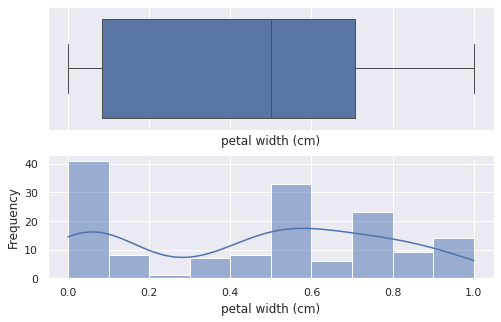

<Figure size 576x360 with 0 Axes>

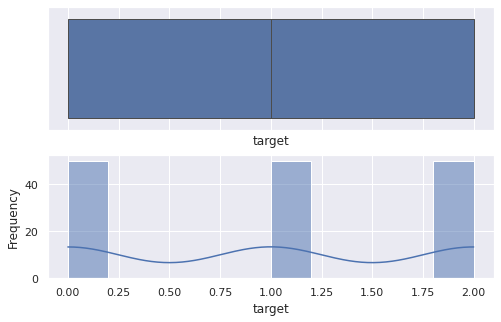

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

<AxesSubplot:>

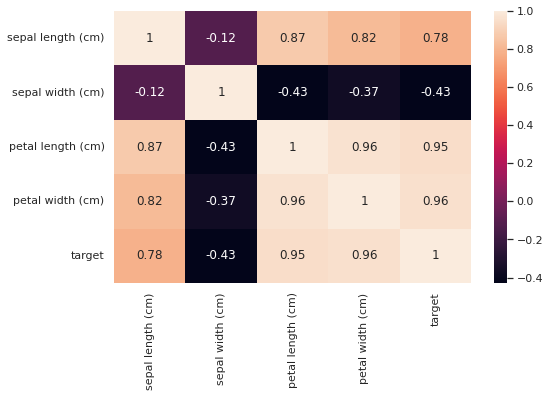

In [76]:
corr = df.corr()
sns.heatmap(corr, annot=True)

## 2 Preprocessat

In [16]:
df.isnull().values.any()

False

> No tenim valors nuls i considerem que no existeixen dades anomeles

#### Hipotesis per determinar si Sepal width i sepal length tenen distribució normal [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [59]:
from scipy import stats

shapiro_test = stats.shapiro(df['sepal length (cm)'])
shapiro_test

print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')
V
if shapiro_test.pvalue>0.05:
    print('No podem rebutjar hipotesis nula')
else:
    print("Podem rebutjar l'hipotesis nula")

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Podem rebutjar l'hipotesis nula


In [60]:
from scipy import stats

shapiro_test = stats.shapiro(df['sepal width (cm)'])
shapiro_test

print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

if shapiro_test.pvalue>0.05:
    print('No podem rebutjar hipotesis nula')
else:
    print("Podem rebutjar l'hipotesis nula")

Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


No podem rebutjar hipotesis nula


> - La distribució de sepal width és normal, per tant aplicarem estandarització
> - Les altres variables no contenen outliers, per tant utilitzarem normalització

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

standColumns = ['sepal width (cm)']
scalerStand = preprocessing.StandardScaler().fit(df[standColumns])
df[standColumns] = scalerStand.transform(df[standColumns])

normColumns = ['sepal length (cm)', 'petal length (cm)','petal width (cm)']
scalerNorm = preprocessing.MinMaxScaler().fit(df[normColumns])
df[normColumns] = scalerNorm.transform(df[normColumns])

<Figure size 576x360 with 0 Axes>

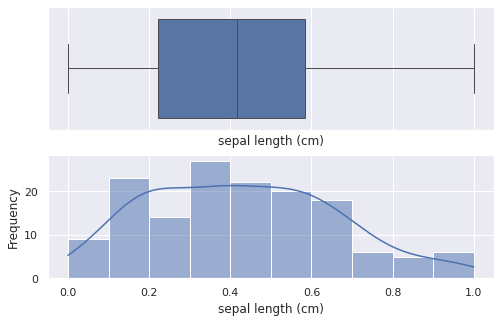

<Figure size 576x360 with 0 Axes>

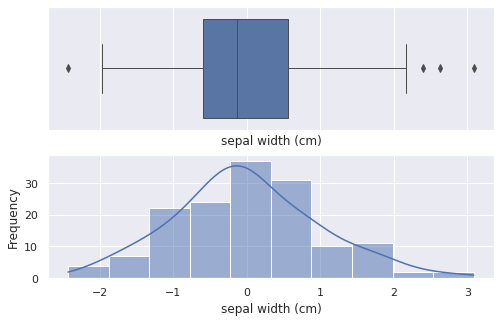

<Figure size 576x360 with 0 Axes>

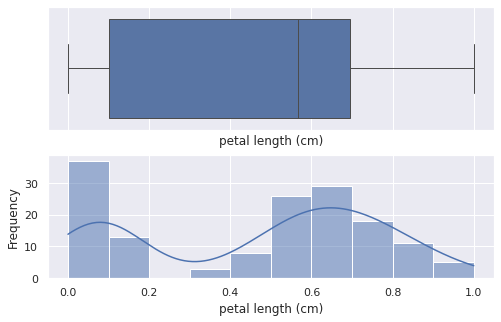

<Figure size 576x360 with 0 Axes>

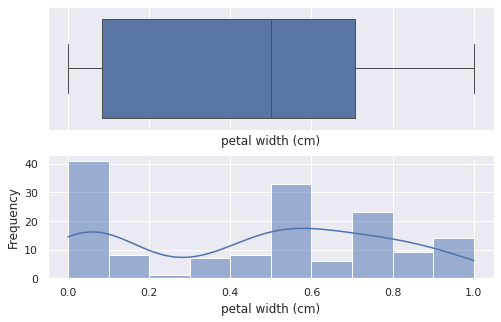

<Figure size 576x360 with 0 Axes>

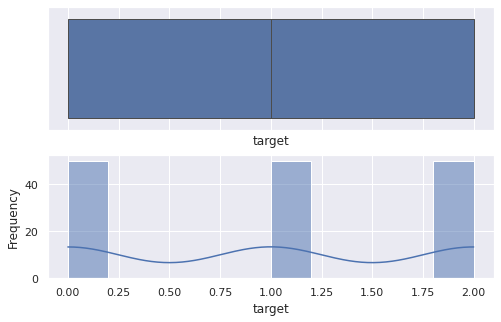

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

## 3 Test/train

In [67]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'],axis=1)
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


## 4 Models

In [111]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

In [88]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=42)

#### Training the models

In [91]:
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [92]:
y_pred_lr = lr.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [93]:
y_pred_rf

array([2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 1, 0])

## 5 Evaluació

In [101]:
from sklearn.metrics import confusion_matrix
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
cf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

[Text(0.5, 1.0, 'Confusion matrix for LR')]

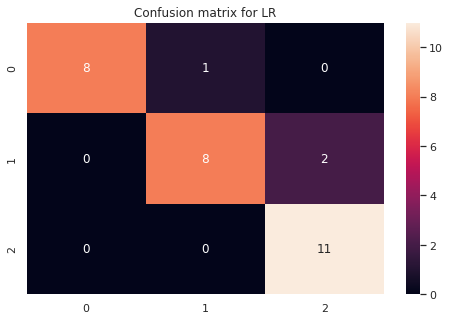

In [100]:
sns.heatmap(cf_matrix_lr, annot=True).set(title='Confusion matrix for LR')

[Text(0.5, 1.0, 'Confusion matrix for SVC')]

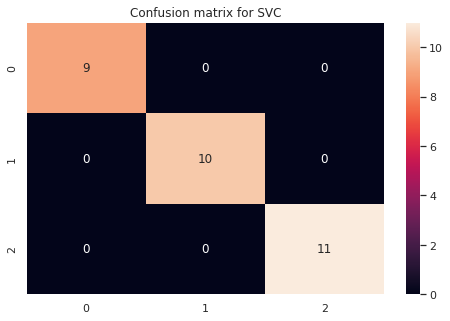

In [102]:
sns.heatmap(cf_matrix_svc, annot=True).set(title='Confusion matrix for SVC')

[Text(0.5, 1.0, 'Confusion matrix for RF')]

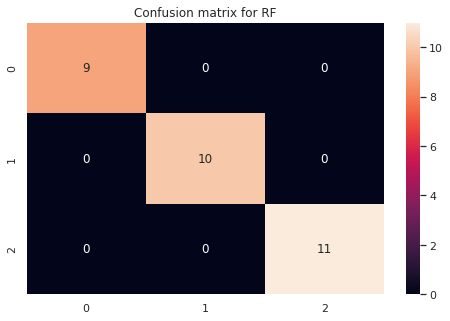

In [103]:
sns.heatmap(cf_matrix_rf, annot=True).set(title='Confusion matrix for RF')

In [107]:
from sklearn.metrics import f1_score
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
f1_svc = f1_score(y_test, y_pred_svc, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
print("F1 for LR: {:.2f}, SVC: {:.2f}, RF: {:.2f}".format(f1_lr, f1_svc, f1_rf) )

F1 for LR: 0.90, SVC: 1.00, RF: 1.00


### Cross Validation

In [115]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_macro'))

[0.91071429 0.8745098  0.78407557 0.87044534 0.95816993]


In [117]:
cv_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_macro')
print("F1 for LR mean: {:.2f}, std: {:.2f}".format(cv_lr.mean(), cv_lr.std()) )

cv_svc = cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_macro')
print("F1 for SVC mean: {:.2f}, std: {:.2f}".format(cv_svc.mean(), cv_svc.std()) )

cv_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1_macro')
print("F1 for RF mean: {:.2f}, std: {:.2f}".format(cv_rf.mean(), cv_rf.std()) )

F1 for LR mean: 0.88, std: 0.06
F1 for SVC mean: 0.95, std: 0.05
F1 for RF mean: 0.95, std: 0.03


## 6. Millors paràmetres

In [121]:
from sklearn.model_selection import RandomizedSearchCV
params = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "penalty": ["l1", "l2", "elasticnet"]}
rsearch = RandomizedSearchCV(estimator=lr,
                             param_distributions=params,cv=5,
                             n_iter=10,random_state=42,scoring='f1_macro')
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_params_)

0.9574478680361034
{'solver': 'saga', 'penalty': 'l1'}


[Text(0.5, 1.0, 'Confusion matrix for LR')]

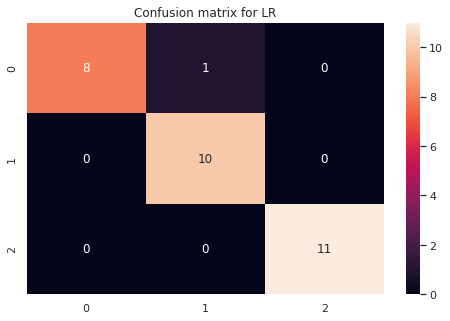

In [124]:
y_pred_RS_ls = rsearch.predict(X_test)
cf_matrix_RS_lr = confusion_matrix(y_test, y_pred_RS_ls)
sns.heatmap(cf_matrix_RS_lr, annot=True).set(title='Confusion matrix for LR')